# Аналитика в авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

**Задачи:** 

- изучить базу данных 

- проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

# Работа с базой данных 

Менеджер авиаперевозчика готовит исследование. Он хочет выявить связь между числом полётов, типом самолётов и календарём музыкальных фестивалей. Помогите ему получить необходимые данные.

Вы решите задачу в несколько шагов, двигаясь от простых запросов к более изощрённым.

**Описание данных**

В вашем распоряжении база данных об авиаперевозках.

Таблица airports — информация об аэропортах

Таблица aircrafts — информация о самолётах

Таблица tickets — информация о билетах

Таблица flights — информация о рейсах

Таблица ticket_flights — стыковая таблица «рейсы-билеты»

Таблица festivals — информация о фестивалях

**Привожу решение задач на SQL:**

1.Найдите количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года. Назовите получившееся поле flights_amount и выведите его. Также напечатайте на экране поле model. Столбцы в таблице должны быть выведены в следующем порядке:
model
flights_amount

In [ ]:
SELECT
    model,
    COUNT(model) AS flight_amount
FROM
     aircrafts
     INNER JOIN flights ON aircrafts.aircraft_code=flights.aircraft_code
WHERE
    departure_time::date BETWEEN '2018-09-01' AND '2018-09-30'
GROUP BY
    model 

2.
Посчитайте отправленные в сентябре рейсы самолётов следующих моделей:
Boeing,
Airbus,
другие (“other”).
Назовите получившуюся переменную flights_amount и выведите её значение на экран.

In [ ]:
SELECT
    COUNT(model) AS flights_amount,
    model
FROM
    (SELECT
        CASE WHEN model LIKE 'Boeing%' THEN
            'Boeing'
        WHEN model LIKE 'Airbus%' THEN
            'Airbus'
        WHEN model NOT LIKE 'Boeing%' AND model NOT LIKE 'Airbus%' THEN
            'other'
        END AS model,
        departure_time
        FROM
            aircrafts
            INNER JOIN flights ON aircrafts.aircraft_code=flights.aircraft_code
        WHERE
            EXTRACT(MONTH FROM departure_time)='09') AS newt
GROUP BY
    model 

3.
Посчитайте среднее количество прибывающих рейсов в день для каждого города за август 2018 года. Назовите получившееся поле average_flights, вместе с ним выведите столбец city.
Выводите столбцы в таком порядке:
city,
average_flights.

In [ ]:
SELECT
    T.city,
    AVG(T.flights_amount) AS average_flights
FROM (
    SELECT
        city,
        EXTRACT(day FROM flights.arrival_time) AS day_number,
        COUNT(flights.flight_id) AS flights_amount
    FROM
        flights
        INNER JOIN airports ON airports.airport_code = flights.arrival_airport
    WHERE
        CAST(flights.arrival_time AS date) BETWEEN '2018-08-01' AND '2018-08-31'
    GROUP BY
        city,
        day_number) AS T
GROUP BY
    city;

4.
Установите фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили. Выведите название фестиваля festival_name и номер недели festival_week.

In [ ]:
SELECT
    T.festival_week,
    T.festival_name
FROM (
        SELECT
            festival_name,
            EXTRACT(week FROM festivals.festival_date) AS festival_week
        FROM
            festivals
        WHERE
            festival_city = 'Москва'
            AND CAST(festivals.festival_date AS date) BETWEEN '2018-07-23' AND '2018-09-30') AS T;

5.
Для каждой недели с 23 июля по 30 сентября 2018 года посчитайте билеты, которые купили на рейсы в Москву (номер недели week_number и количество билетов ticket_amount). Получите таблицу:
с количеством купленных за неделю билетов;
отметкой, проходил ли в эту неделю фестиваль;
название фестиваля festival_name;
номер недели week_number.
Выводите столбцы в таком порядке: - week_number - ticket_amount - festival_week - festival_name

In [ ]:
SELECT
    T.week_number,
    T.ticket_amount,
    T.festival_week,
    T.festival_name
FROM ((
        SELECT
            EXTRACT(week FROM flights.departure_time) AS week_number,
            COUNT(ticket_flights.ticket_no) AS ticket_amount
        FROM
            airports
            INNER JOIN flights ON airports.airport_code = flights.arrival_airport
            INNER JOIN ticket_flights ON flights.flight_id = ticket_flights.flight_id
        WHERE
            airports.city = 'Москва'
            AND CAST(flights.departure_time AS date) BETWEEN '2018-07-23' AND '2018-09-30'
        GROUP BY
            week_number) t
    LEFT JOIN (
        SELECT
            festival_name,
            EXTRACT(week FROM festivals.festival_date) AS festival_week
        FROM
            festivals
        WHERE
            festival_city = 'Москва'
            AND CAST(festivals.festival_date AS date) BETWEEN '2018-07-23' AND '2018-09-30') t2 ON t.week_number = t2.festival_week) AS T;

# Аналитика

**Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


**1. Импортируем необходимые библиотеки и датасеты:**

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,8) 
plt.style.use('ggplot') 
pd.set_option('display.max_columns', None)

In [2]:
df_1 = pd.read_csv('/datasets/query_1.csv')
df_2 = pd.read_csv('/datasets/query_3.csv')

**2. Изучим результаты первого запроса:**

In [3]:
df_1.head(5)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [4]:
df_1.tail()

,model,flights_amount
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [5]:
df_1.sample(5)

,model,flights_amount
1,Airbus A321-200,960
7,Sukhoi SuperJet-100,4185
4,Boeing 777-300,300
3,Boeing 767-300,600
0,Airbus A319-100,607


In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [9]:
df_1.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [10]:
df_1.duplicated().sum()

0

In [11]:
df_1.isnull().sum()

model             0
flights_amount    0
dtype: int64

**Изучим результаты третьего запроса:**

In [12]:
df_2.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [13]:
df_2.tail()

,city,average_flights
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935
100,Ярославль,1.322581


In [14]:
df_2.sample(5)

,city,average_flights
98,Южно-Сахалинск,4.290323
46,Нальчик,3.000000
96,Чита,1.580645
50,Нижневартовск,3.129032
92,Ханты-Мансийск,8.419355


In [15]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [16]:
df_2.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [17]:
df_2.duplicated().sum()

0

In [18]:
df_2.isnull().sum()

city               0
average_flights    0
dtype: int64

Вывод: 

1. пропуски и дубликаты не обнаружены;

2. типы данных соответствуют данным

**3. Выбрать топ-10 городов по количеству рейсов**


In [19]:
df_2_plot = df_2.sort_values(by='average_flights', ascending=False).head(10)
df_2_plot

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


**Строим график по датасету с самолетами (модели самолётов и количество рейсов)**

In [20]:
df_1_plot = df_1.sort_values(by='flights_amount', ascending=False).head(10)
df_1_plot

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


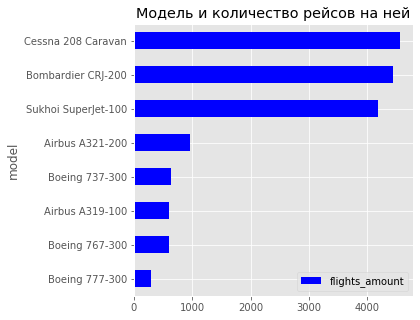

In [21]:
df_1_plot.sort_values(by='flights_amount').\
    plot(x='model', y='flights_amount', kind='barh', grid=True, figsize=(5, 5),\
    title='Модель и количество рейсов на ней', color='b')

Вывод: лидируют с большим отрывом 3 модели: Cessna 208, Bombardier 200 и Sukhoi 100.

**Строим график по датасету с городами (города и количество рейсов)**

In [22]:
df_2_plot = df_2.sort_values(by='average_flights', ascending=False).head(103)
df_2_plot

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
...,...,...
22,Ижевск,1.000000
65,Петропавловск-Камчатский,1.000000
31,Комсомольск-на-Амуре,1.000000
58,Нягань,1.000000


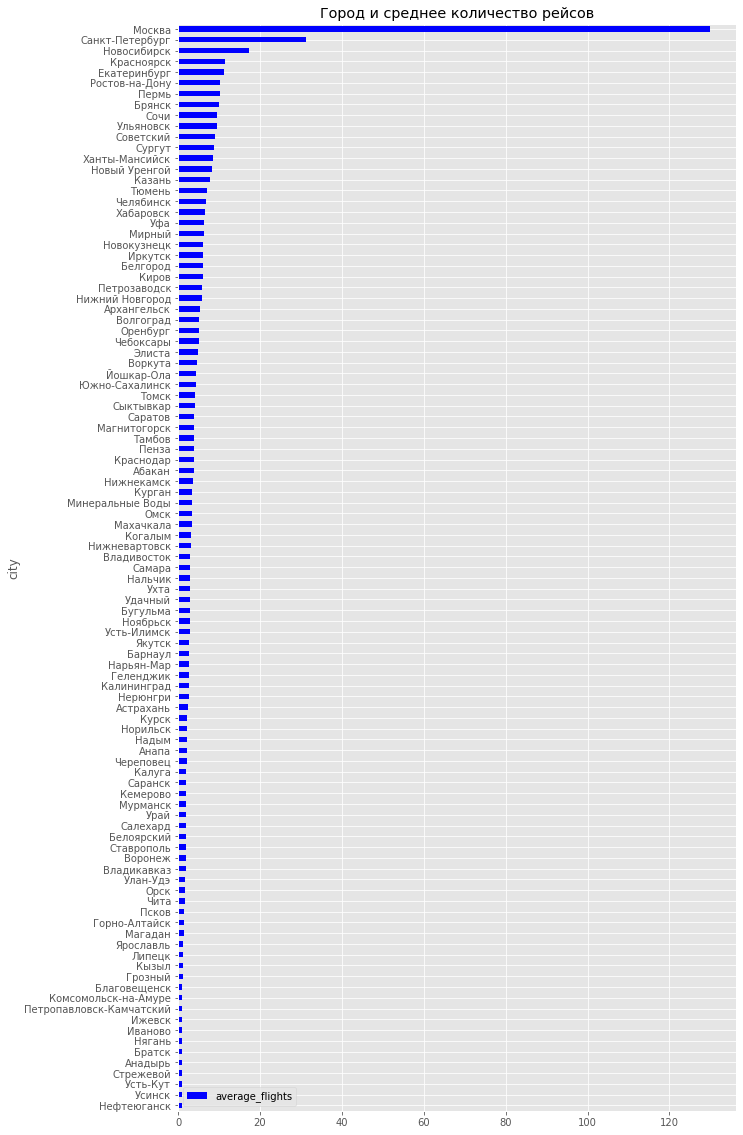

In [23]:
df_2_plot.sort_values(by='average_flights').\
    plot(x='city', y='average_flights', kind='barh', grid=True, figsize=(10, 20),\
    title='Город и среднее количество рейсов', color='b')

Вывод: один город находится в большом отрыве от остальных, после него еще 2 значительно больше оставшихся городов. Распределение оставшихся городов плавно убывает.

**Строим график по датасету с городами (топ-10 городов и количество рейсов)**

Теперь приблизим первые (наиболее интересные нам) 10 городов.

In [24]:
df_2_plot = df_2.sort_values(by='average_flights', ascending=False).head(10)
df_2_plot

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


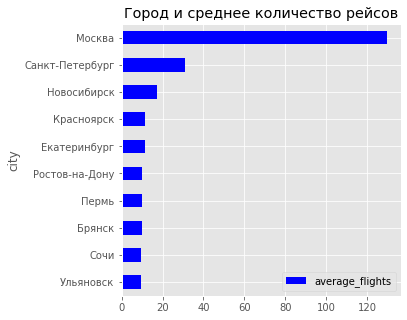

In [25]:
df_2_plot.sort_values(by='average_flights').\
    plot(x='city', y='average_flights', kind='barh', grid=True, figsize=(5, 5),\
    title='Город и среднее количество рейсов', color='b')

Вывод: ожидаемо, с большим отрывом от других городов, лидирует Москва, за ней Санкт-Петербург и Новосибирск

# Результаты исследования

1. С помощью SQL мы выгрузили данные из базы данных в удобном для нам формате - отобрали необходимые таблицы, которые легко анализировать

2. Провели анализ полученных таблиц и выяснили, что в них нет пропусков, дубликатов, типы данных соответствуют данным

3. Наиболее популярные города - Москва, Санкт-Петербург и Новосибирск (и, вполне вероятно, наиболее популярные города для проведения фестивалей), а наиболее популярные модели самолетов - Cessna 208 Caraval, Bombardier CRJ-200 и Sukhoi SuperJet-100.
